In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error


In [2]:
# Reading the dataset
df=pd.read_csv('D:Salary_Data.csv')
print(df.shape)
df.head()

(24, 3)


,YearsExperience,Jobrole,Salary
0,1.1,data,15000
1,2.0,data,25000
2,3.0,data,40000
3,4.0,data,50000
4,5.0,data,62000


In [3]:
# An overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  24 non-null     float64
 1   Jobrole          24 non-null     object 
 2   Salary           24 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 708.0+ bytes


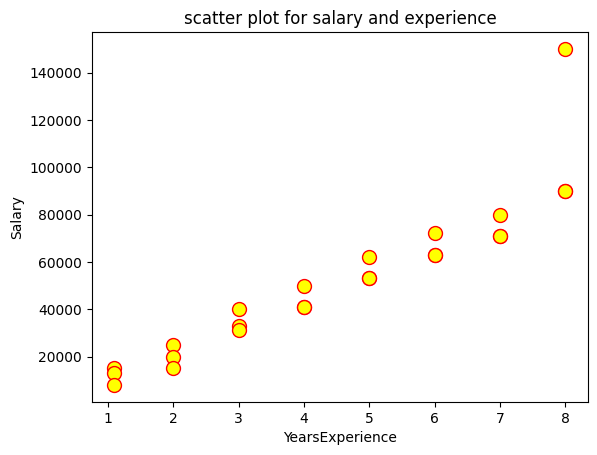

In [4]:
# EDA (Exploratory data analysis)
# scatter plot for salary and experience

plt.scatter(df['YearsExperience'],df['Salary'],c="yellow",marker="o",edgecolor="red",s=100)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('scatter plot for salary and experience')
#plt.savefig("scatter plot for salary and experience.png")
plt.show()


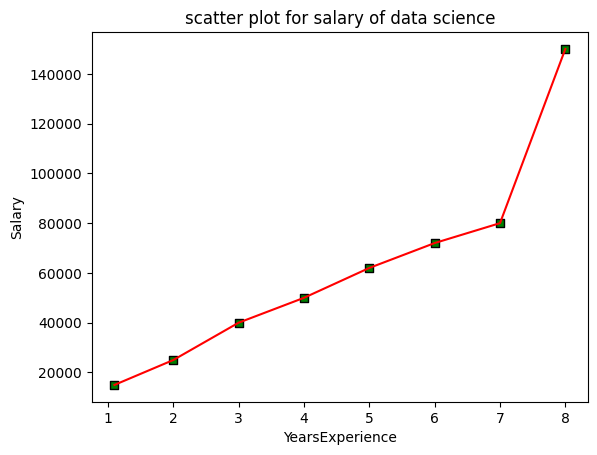

In [5]:
#scatter plot for data
s=df.loc[df['Jobrole']=='data']
x=s['YearsExperience']
y=s['Salary']
plt.scatter(x,y,marker="s",c="green",edgecolor="black")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('scatter plot for salary of data science')
plt.plot(x,y,c="red")
#plt.savefig("scatter come line plot for salary of data science.png")
plt.show()


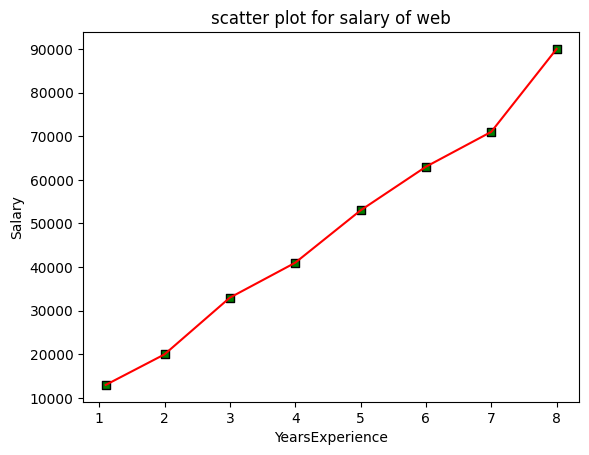

In [6]:
#scatter plot for web

s=df.loc[df['Jobrole']=='web']
x=s['YearsExperience']
y=s['Salary']
plt.scatter(x,y,marker="s",c="green",edgecolor="black")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('scatter plot for salary of web')
plt.plot(x,y,c="red")
#plt.savefig("scatter come line plot for salary of web.png")
plt.show()


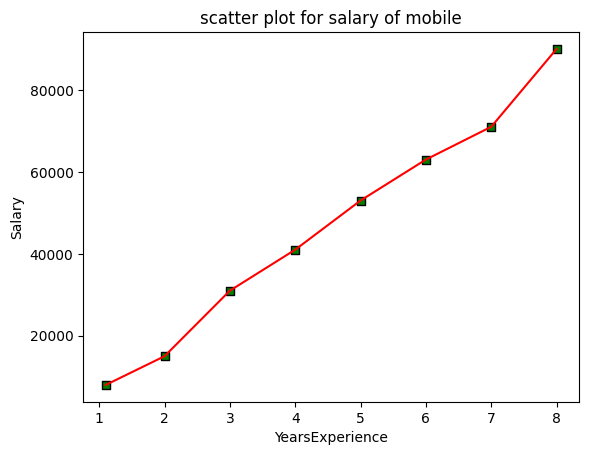

In [7]:
#scatter plot for mobile

s=df.loc[df['Jobrole']=='mobile']
x=s['YearsExperience']
y=s['Salary']
plt.scatter(x,y,marker="s",c="green",edgecolor="black")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('scatter plot for salary of mobile')
plt.plot(x,y,c="red")
#plt.savefig("scatter come line plot for salary of mobile.png")
plt.show()


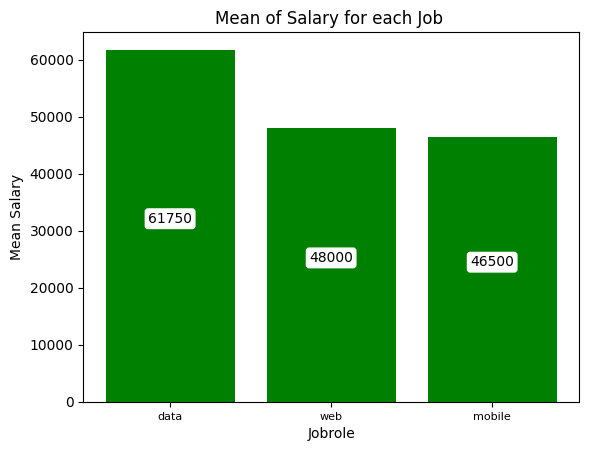

In [8]:
# Bar plot of avg salary of all job roles

jobTitleSalary = df.groupby('Jobrole').agg({'Salary': lambda x: x.mean()}).sort_values('Salary', ascending=False)[:5].reset_index()
bars = plt.bar(jobTitleSalary['Jobrole'], jobTitleSalary['Salary'],color="green")
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()//2, int(bar.get_height()), ha='center', va='bottom', fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'))
plt.xticks(fontsize=8)
plt.title('Mean of Salary for each Job ')
plt.xlabel('Jobrole')
plt.ylabel('Mean Salary')
#plt.savefig("Bar plot for avg salary off all job roles.png")
plt.show()


In [9]:
# predicting model
# Encode categorical variables (Jobrole)

label_encoder = LabelEncoder()
df['Jobrole'] = label_encoder.fit_transform(df['Jobrole'])

# Split data into features (X) and target (y)

X = df[['YearsExperience', 'Jobrole']]
y = df['Salary']

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions

y_pred = model.predict(X_test)

# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Example to predict salary
#jobroles(   data , web , mobile )

print("\t ---Please Enter Your Details To Predict Salary---\n")
years_exp = float(input("Enter the years of experiance(Ex:1.1) == "))
print("types of job roles:\n data \n mobile \n web")
job_role = str(input("Enter job role == "))

# Encode job role using the same label encoder

job_role_encoded = label_encoder.transform([job_role])

# Prepare input for prediction

input_data = pd.DataFrame({'YearsExperience': [years_exp], 'Jobrole': job_role_encoded})

# Predict the salary

predicted_salary = model.predict(input_data)
print(f"Predicted salary for {years_exp} years of experience as a {job_role} = ₹ {predicted_salary[0]}")

# thanks message

print("\n\t --- Thanks For Using Our Salary Predicting Model---")


Mean Squared Error: 52831633.05432778
	 ---Please Enter Your Details To Predict Salary---

types of job roles:
 data 
 mobile 
 web
Predicted salary for 2.5 years of experience as a data = ₹ 32399.33651254407

	 --- Thanks For Using Our Salary Predicting Model---
